<h1>외곽선 검출</h1>

    객체의 외각선은 객체 영역 픽셀 중에서 배경 영역과 인접한 일련의 픽셀을 의미한다.

    OpenCV에서는 이 외각선을 그리는 점들을 모아 contours 변수로 정리하여 사용한다.

 ![img](./img/contours/sample.png)

    이 사진을 예시로 들면 저 원을 구성하는 점들의 좌표를 contours 변수에 넣을 수 있다.
    
    이런 외각선을 검출해주는 기능을 OpenCV에서는 findContours()를 통해 사용할 수 있다.
    사용가능한 인자들은 아래와 같다.
   
 ![img](./img/contours/contours_opencv.png)
    
    findContours() 메소드는 반드시 이진화가 선행되어야 한다.
    0이 아닌 값이 있다면 그것을 객체로 인식해 외각선을 검출한다.
    
    hierarchy 인자는 계층 정보에 대한 값을 반환하는 것인데
    x번째 외각선이 있다고 가정하면 다음과 같은 값을 가진다.
|||
|:---:|:---:|
|hierarchy[x][0]|다음 외곽선 번호|
|hierarchy[x][1]|이전 외곽선 번호|
|hierarchy[x][2]|자식 외곽선 번호|
|hierarchy[x][3]|부모 외곽선|
    
    만약 해당 외곽선이 존재하지 않으면 1을 반환한다.
    
    
    mode인자는 외곽선을 검출하는 방법을 선택할 수 있다.
    mode에서 사용가능한 RetrievalModes 상수 리스트는 다음과 같다.
    
|상수명|설명|
|:---:|:---:|
|RETR_EXTERNAL|객체 바깥쪽 외각선만 검색, 계층 구조 X|
|RETR_LIST|객체 바깥쪽과 안쪽 모두 검색, 계층 구조 X|
|RETR_CCOMP|모든 외각선 검색, 2단계 계층 구조|
|RETR_TREE|모든 외각선 검색, 전체 계층 구조|

    method 인자에는 검출된 외곽선 점들의 좌표를 근사화 하는 방법을 지정할 수 있다.
    method 인자에서 사용 가능한 Contour Approximation Modes 상수는 아래와 같다.
    
|상수명|설명|
|:---:|:---:|
|CHAIN_APPROX_NONE|모든 외곽선 점들의 좌표를 지정|
|CHAIN_APPROX_SIMPLE|외곽선 중에서 수평선 수직선 대각선 성분은 끝점만 저장|
|CHAIN_APPROX_TC89_L1|Teh & Chin L1 근사화|
|CHAIN_APPROX_TC89_KCOS|Teh & Chin k cos 근사화|    


    findContours()로 외곽선을 찾았다면 drawContours()를 통해 외곽선을 그릴 수 있다.
    사용가능한 인자들은 다음과 같다.
 ![img](./img/contours/draw.png)

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def two_img_show(fir_img,fir_name,sec_img,sec_name):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(fir_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(fir_name)
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(sec_img, cv2.COLOR_BGR2RGB))
    ax2.set_title(sec_name)
    ax2.axis("off")

    plt.show()

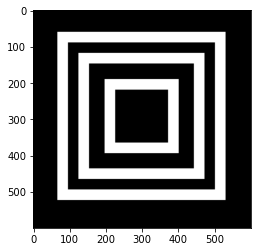

In [4]:
#사용할 이미지
img = cv2.imread("./img/contours/cont.png",cv2.IMREAD_GRAYSCALE)
origin_img = cv2.imread("./img/contours/cont.png")
border , binary = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
plt.imshow(img,cmap='gray')

In [5]:
#findContours로 외각선 검출
contours , h = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours

[array([[[197, 190]],
 
        [[197, 191]],
 
        [[197, 192]],
 
        ...,
 
        [[200, 190]],
 
        [[199, 190]],
 
        [[198, 190]]], dtype=int32),
 array([[[226, 220]],
 
        [[227, 219]],
 
        [[228, 219]],
 
        ...,
 
        [[226, 223]],
 
        [[226, 222]],
 
        [[226, 221]]], dtype=int32),
 array([[[125, 118]],
 
        [[125, 119]],
 
        [[125, 120]],
 
        ...,
 
        [[128, 118]],
 
        [[127, 118]],
 
        [[126, 118]]], dtype=int32),
 array([[[154, 148]],
 
        [[155, 147]],
 
        [[156, 147]],
 
        ...,
 
        [[154, 151]],
 
        [[154, 150]],
 
        [[154, 149]]], dtype=int32),
 array([[[67, 60]],
 
        [[67, 61]],
 
        [[67, 62]],
 
        ...,
 
        [[70, 60]],
 
        [[69, 60]],
 
        [[68, 60]]], dtype=int32),
 array([[[96, 90]],
 
        [[97, 89]],
 
        [[98, 89]],
 
        ...,
 
        [[96, 93]],
 
        [[96, 92]],
 
        [[96, 91]]], dtype=

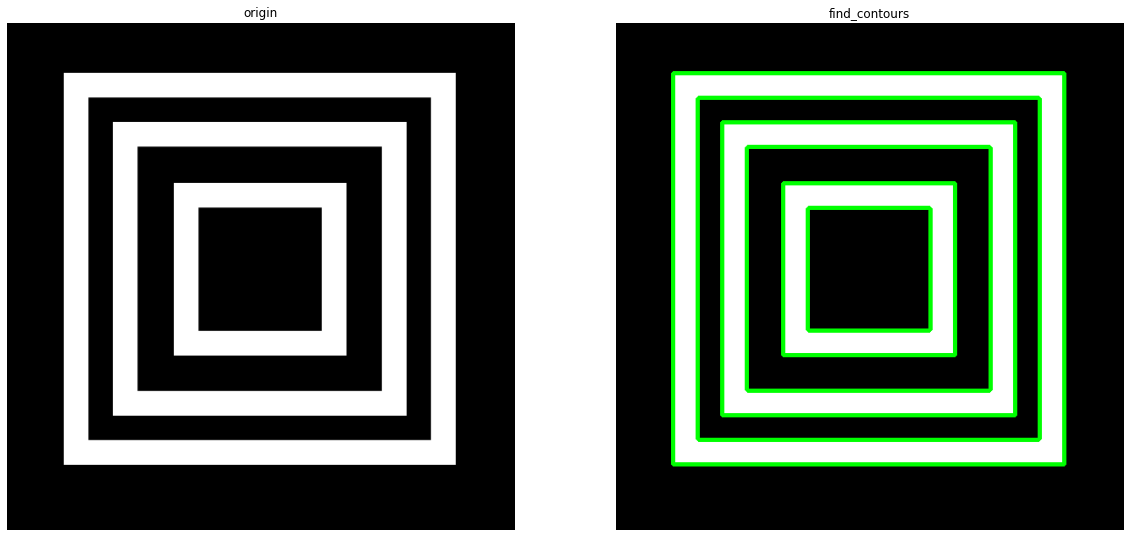

In [8]:
output_img = origin_img.copy()
cv2.drawContours(output_img,contours,-1,(0,255,0),4)
two_img_show(origin_img,'origin',output_img,'find_contours')